# Run length encoding

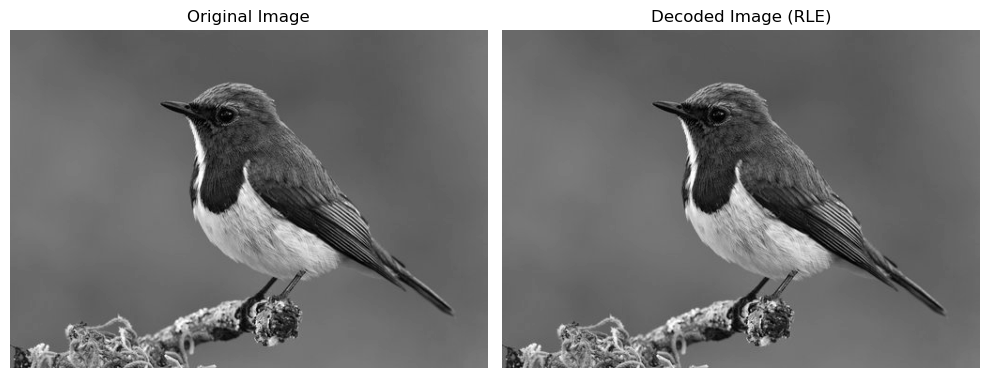

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte

# Step 1: Load the image and convert it to grayscale
image_path = r"C:\Users\roari\Downloads\Bird 11.jpg"
image = io.imread(image_path, as_gray=True)
image = img_as_ubyte(image)  # Convert image to 8-bit unsigned integers

# Step 2: Flatten the image into a 1D array of pixel values
pixels = image.flatten()

# Step 3: Run Length Encoding
def run_length_encoding(pixels):
    encoded = []
    count = 1
    previous_pixel = pixels[0]

    for pixel in pixels[1:]:
        if pixel == previous_pixel:
            count += 1
        else:
            encoded.append((previous_pixel, count))
            previous_pixel = pixel
            count = 1
            
    # Add the last run
    encoded.append((previous_pixel, count))
    
    return encoded

# Step 4: Decode the Run Length Encoded data
def run_length_decoding(encoded):
    decoded = []
    for pixel, count in encoded:
        decoded.extend([pixel] * count)
    return np.array(decoded)

# Encode the image using RLE
encoded_image = run_length_encoding(pixels)

# Decode the RLE back to the original image
decoded_pixels = run_length_decoding(encoded_image)
decoded_image = np.reshape(decoded_pixels, image.shape)

# Step 5: Display original and decoded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Decoded Image (RLE)')
plt.imshow(decoded_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()